<a href="https://colab.research.google.com/github/ssse0y/-KidscafeLocationAnalysis/blob/main/MCLP%2Bp_median.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0.데이터 읽어오기


In [ ]:
# 나눔고딕 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,711 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126101 files and dire

In [ ]:
pip install haversine


In [ ]:
# 📦 설치 (한 번만 실행하면 됩니다)
!pip install geopandas shapely

# 📊 정적 격자 지도 시각화
import geopandas as gpd
import pandas as pd
from shapely import wkt
import math
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
# CSV 불러오기
df = pd.read_csv('/content/drive/MyDrive/광진구/1-7세, 40대, 총인구수, 상권_폐업, 행정동_소비소득, 아파트_세대수, 쇼핑몰_개수 추가, 키즈카페_개수 추가_최종.csv')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

gid  202410_기준_유아인구수  \
0  다사607477              NaN   
1  다사608477              NaN   
2  다사608478              NaN   
3  다사608479              NaN   
4  다사608480              NaN   

                                            geometry  202410_기준_40대인구수  \
0  POLYGON ((127.05521633861804 37.52776885070623...               NaN   
1  POLYGON ((127.05634807254776 37.52777310757021...               NaN   
2  POLYGON ((127.05634273423657 37.52867444283112...               NaN   
3  POLYGON ((127.05633739568759 37.52957577795346...               NaN   
4  POLYGON ((127.05633205690081 37.53047711293726...               NaN   

   202307_기준_공시지가  202410_기준_총인구수 행정동명  폐업_영업_개월_평균_x  월_평균_소득_금액_x  지출_총금액_x  \
0             NaN             NaN  NaN            NaN           NaN       NaN   
1             NaN             NaN  NaN            NaN           NaN       NaN   
2             NaN             NaN  NaN            NaN           NaN       NaN   
3             NaN             NaN  NaN            NaN           NaN       NaN   
4             NaN             NaN  NaN            NaN           NaN       NaN   

   교육_지출_총금액_x  소득_구간_코드_x  세대수  쇼핑몰개수  키즈카페개수  총수용인원  행정동기반_취약계층비율  
0          NaN         NaN  NaN    NaN     NaN    NaN           NaN  
1          NaN         NaN  NaN    NaN     NaN    NaN           NaN  
2          NaN         NaN  NaN    NaN     NaN    NaN           NaN  
3          NaN         NaN  NaN    NaN     NaN    NaN           NaN  
4          NaN         NaN  NaN    NaN     NaN    NaN           NaN

In [ ]:
!pip install geopandas shapely pyproj

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely import wkt

# geometry 컬럼을 WKT(문자열 → POLYGON)으로 변환
df['geometry'] = df['geometry'].apply(wkt.loads)

# GeoDataFrame으로 변환
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')  # WGS 84 좌표계


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51592 (\N{HANGUL SYLLABLE JEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

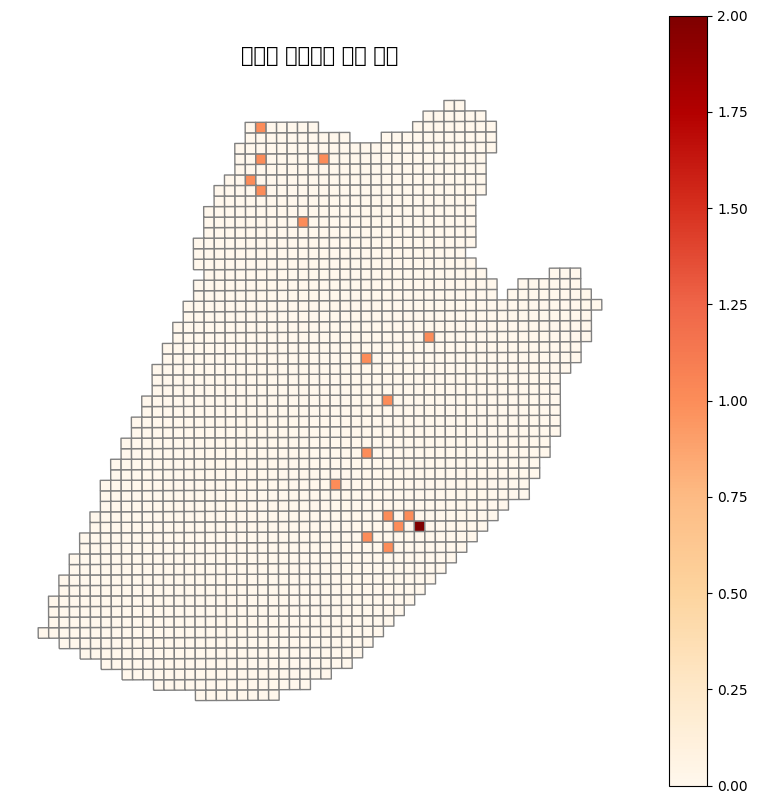

In [ ]:
import matplotlib.pyplot as plt
# 한글 폰트 설정 (예: 나눔고딕)
plt.rcParams['font.family'] = 'NanumGothic'  # 또는 'Malgun Gothic', 'AppleGothic' 등

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# NaN을 0으로 대체
gdf['키즈카페개수'] = gdf['키즈카페개수'].fillna(0)

# 시각화
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='키즈카페개수', ax=ax, legend=True, cmap='OrRd', edgecolor='grey')
ax.set_title('격자별 키즈카페 개수 분포', fontsize=15)
plt.axis('off')
plt.show()


#1.상관분석

In [ ]:
# 수치형 변수에 대해 결측치를 0으로 대체
numeric_df = df.drop(columns=['gid', 'geometry']).fillna(0)

# 상관계수 분석
correlation_matrix = numeric_df.corr(numeric_only=True)

# 키즈카페개수와의 상관관계 추출
kids_cafe_corr = correlation_matrix['키즈카페개수'].sort_values(ascending=False)
kids_cafe_corr


키즈카페개수              1.000000
총수용인원               0.836418
세대수                 0.401186
202410_기준_유아인구수     0.137020
202410_기준_총인구수      0.108564
202410_기준_40대인구수    0.108564
교육_지출_총금액_x         0.081100
202307_기준_공시지가      0.049358
지출_총금액_x            0.025734
월_평균_소득_금액_x        0.007662
소득_구간_코드_x          0.005737
쇼핑몰개수              -0.009719
행정동기반_취약계층비율       -0.013666
폐업_영업_개월_평균_x      -0.017602
Name: 키즈카페개수, dtype: float64

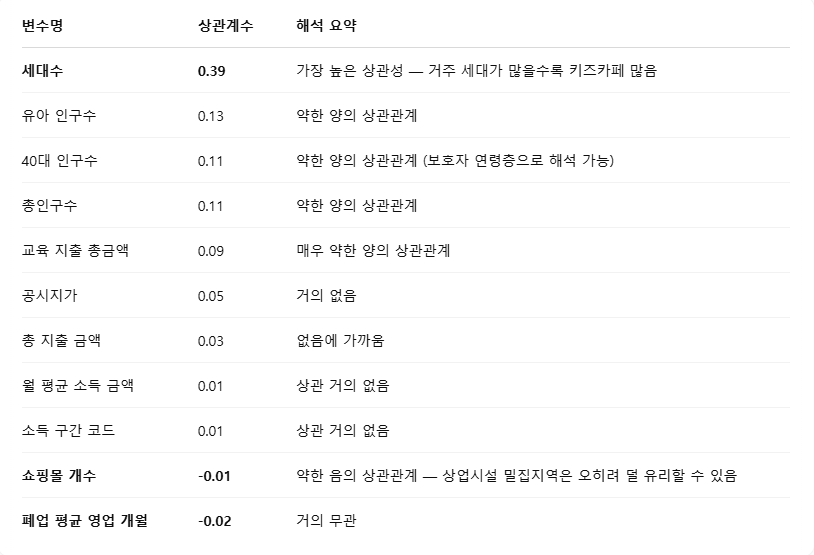

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local

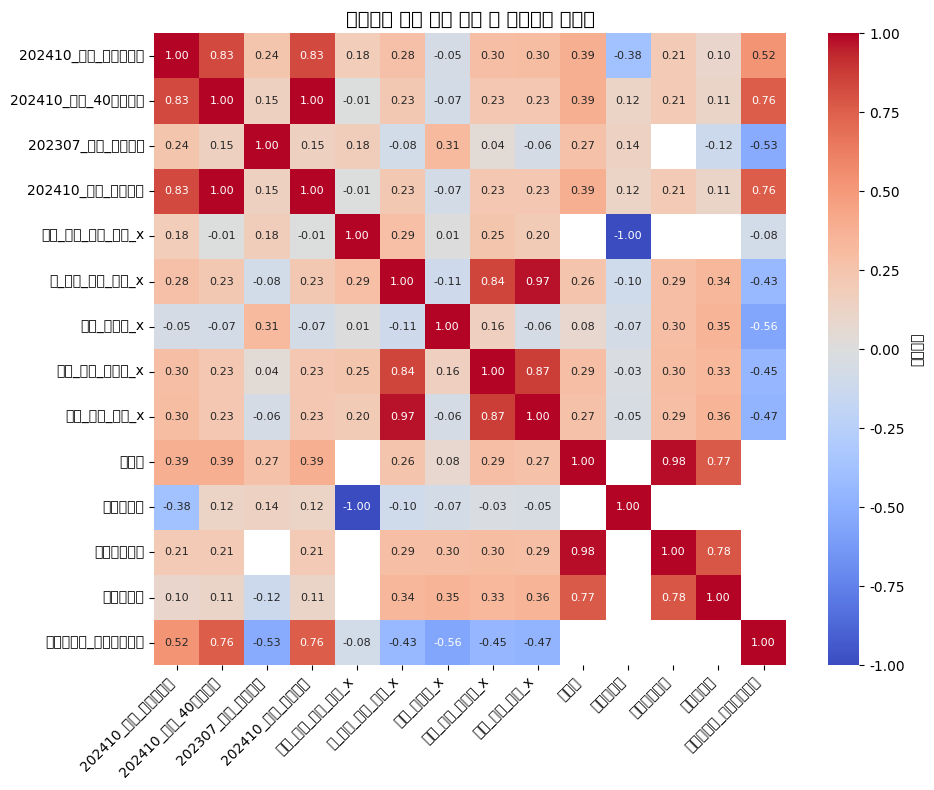

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관계수 행렬 시각화용 변수만 추출
selected_columns = numeric_df.columns
# 숫자형 데이터만 추출
numeric_df = df.select_dtypes(include=['number'])

# 상관계수 계산
corr_matrix = numeric_df.corr()


# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={'label': '상관계수'}, annot_kws={"size": 8})
plt.title('키즈카페 개수 관련 변수 간 상관관계 히트맵', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#2.군집분석

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50648 (\N{HANGUL SYLLABLE EL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48277 (\N{HANGUL SYLLABLE BEOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

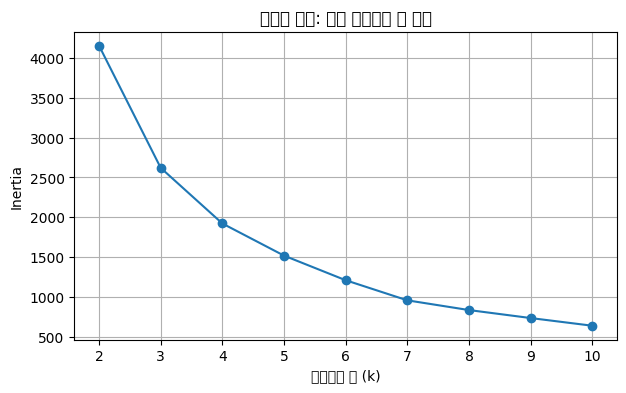

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# 키즈카페 개수 제외한 변수들 중, 상관계수 0.1 이상인 변수만 선택
selected_vars = ['세대수', '202410_기준_유아인구수', '202410_기준_40대인구수', '202410_기준_총인구수']

# 결측치 0으로 채움
cluster_df = df[selected_vars].fillna(0)

# 정규화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

# 최적 k 확인을 위한 엘보우용 inertia 저장
# KMeans에서 n_init 값을 정수로 수정
inertia = []
K_range = range(2, 11)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

# inertia 값을 시각화
plt.figure(figsize=(7, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('엘보우 방법: 최적 클러스터 수 결정')
plt.xlabel('클러스터 수 (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
# k=4로 KMeans 클러스터링 수행
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

# 원본 df에 클러스터 라벨 추가
df_clustered = df.copy()
df_clustered['클러스터'] = cluster_labels

# 클러스터별 중심점 및 분포 요약
cluster_summary = df_clustered.groupby('클러스터')[selected_vars + ['키즈카페개수']].mean().round(2)

# 결과 반환
cluster_summary


세대수  202410_기준_유아인구수  202410_기준_40대인구수  202410_기준_총인구수  키즈카페개수
클러스터                                                                    
0      149.07             9.43             58.15           58.15     1.0
1      189.62             0.51             18.07           18.07     1.0
2     1367.86            29.29            133.43          133.43     2.0
3      391.54            40.70            156.88          156.88     1.0

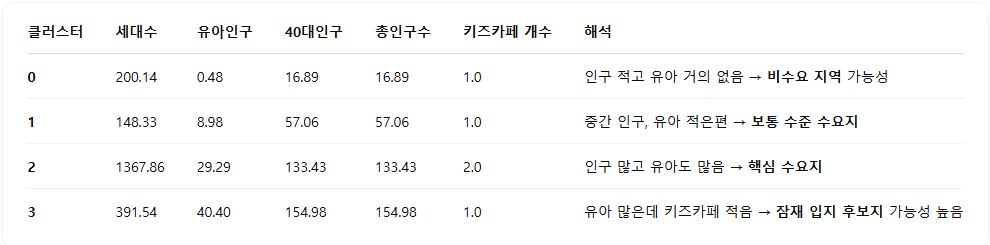

#3.MCLP

##3-1.중심 좌표 계산

In [ ]:
import folium

# 중심 좌표 계산
centroids = [geom.centroid for geom in df_clustered['geometry']]
center_lat = sum(pt.y for pt in centroids) / len(centroids)
center_lon = sum(pt.x for pt in centroids) / len(centroids)

# folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# 클러스터별 색상 지정
colors = ['blue', 'green', 'orange', 'red']

# 클러스터 0~3 시각화
for _, row in df_clustered.iterrows():
    cluster = int(row['클러스터'])
    geom = row['geometry']
    coords = list(geom.exterior.coords)
    folium.Polygon(
        locations=[[lat, lon] for lon, lat in coords],
        color=colors[cluster],
        fill=True,
        fill_opacity=0.5,
        popup=f"클러스터 {cluster}"
    ).add_to(m)

m



In [ ]:
# 1. 수요지 중심 좌표 계산
demand_centroids = [geom.centroid for geom in df_clustered['geometry']]
demand_coords = np.array([[pt.y, pt.x] for pt in demand_centroids])
demand_weights = df_clustered['202410_기준_유아인구수'].fillna(0).values

# 2. 후보지 중심 좌표 계산
candidate_geoms = df_clustered[df_clustered['클러스터'] == 3]['geometry']
candidate_centroids = [geom.centroid for geom in candidate_geoms]
candidate_coords = np.array([[pt.y, pt.x] for pt in candidate_centroids])


print(demand_coords)

[[ 37.52822165 127.05577953]
 [ 37.5282259  127.05691127]
 [ 37.52912723 127.05690594]
 ...
 [ 37.55636988 127.11448651]
 [ 37.55727122 127.11448187]
 [ 37.55637357 127.11561869]]


In [ ]:
demand_coords.dtype

dtype('float64')

##3-2.키즈카페 위치 불러오기

In [ ]:
kids=pd.read_csv("/content/drive/MyDrive/광진구/사설키즈카페_주소(카카오+네이버+구글기준).csv")

In [ ]:
kids['geometry'] = list(zip(kids['위도'], kids['경도']))

In [ ]:
kids['geometry']

0      (37.5406764, 127.098826)
1     (37.5394287, 127.0915433)
2     (37.5454994, 127.0887779)
3      (37.5356993, 127.095765)
4       (37.5507515, 127.07087)
5     (37.5499175, 127.0823376)
6         (37.5469, 127.078044)
7       (37.5329729, 127.07708)
8       (37.53173, 127.0811803)
9     (37.5333386, 127.0687835)
10    (37.5349189, 127.0703778)
11     (37.531007, 127.0642256)
12    (37.5391252, 127.0696784)
13    (37.5382808, 127.0712899)
14    (37.5359213, 127.0705285)
15     (37.5595383, 127.077582)
16    (37.5531666, 127.0911078)
17    (37.5649376, 127.0845873)
Name: geometry, dtype: object

In [ ]:
existing_cafe_coords=kids['geometry'].tolist()
existing_cafe_coords

[(37.5406764, 127.098826),
 (37.5394287, 127.0915433),
 (37.5454994, 127.0887779),
 (37.5356993, 127.095765),
 (37.5507515, 127.07087),
 (37.5499175, 127.0823376),
 (37.5469, 127.078044),
 (37.5329729, 127.07708),
 (37.53173, 127.0811803),
 (37.5333386, 127.0687835),
 (37.5349189, 127.0703778),
 (37.531007, 127.0642256),
 (37.5391252, 127.0696784),
 (37.5382808, 127.0712899),
 (37.5359213, 127.0705285),
 (37.5595383, 127.077582),
 (37.5531666, 127.0911078),
 (37.5649376, 127.0845873)]

In [ ]:
df_a=pd.read_csv('/content/drive/MyDrive/광진구/1-7세, 40대, 총인구수, 상권_폐업, 행정동_소비소득, 아파트_세대수, 쇼핑몰_개수 추가, 키즈카페_개수 추가_최종.csv')

In [ ]:
import geopandas as gpd

# 'geometry' 컬럼이 WKT 형식이면 이를 Point, Polygon 등으로 변환
df_a['geometry'] = gpd.GeoSeries.from_wkt(df_a['geometry'])

# GeoDataFrame으로 변환
df_a = gpd.GeoDataFrame(df_a, geometry='geometry')

# 중심점(centroid) 계산
df_a['centroid'] = df_a['geometry'].centroid

# 세대수 > 0인 아파트의 중심 좌표 추출
apartment_coords = [(geom.y, geom.x) for geom in df_a[df_a['세대수'] > 0]['centroid']]


In [ ]:
apartment_coords

[(37.53365500760892, 127.06253839698236),
 (37.53996853868473, 127.06363345679397),
 (37.53366337127122, 127.06480204518465),
 (37.53276620117628, 127.06593909348479),
 (37.53366753683198, 127.06593386963605),
 (37.54448355389433, 127.06587116529752),
 (37.53277035575567, 127.06707090454877),
 (37.53187316342571, 127.06820791222182),
 (37.53277449948847, 127.06820271584485),
 (37.5363798423542, 127.06818192802201),
 (37.54359052143603, 127.06814034126248),
 (37.53097595984316, 127.06934489265645),
 (37.53187729617819, 127.06933971012987),
 (37.53277863237466, 127.06933452737242),
 (37.53367996843263, 127.0693293443841),
 (37.53548264013299, 127.0693189777148),
 (37.53098008161599, 127.07047667717643),
 (37.532782754414264, 127.07046633913085),
 (37.534585426658445, 127.07045600016423),
 (37.53638809834854, 127.0704456602765),
 (37.530984192542924, 127.07160846192664),
 (37.53278686560725, 127.07159815111959),
 (37.53458953811751, 127.07158783939387),
 (37.53639221007367, 127.0715775267

##3-3.후보지 필터링

In [ ]:
candidate_coords = [tuple(c) for c in candidate_coords]
existing_cafe_coords = [tuple(c) for c in existing_cafe_coords]

In [ ]:
df

gid  202410_기준_유아인구수  \
0     다사607477              NaN   
1     다사608477              NaN   
2     다사608478              NaN   
3     다사608479              NaN   
4     다사608480              NaN   
...        ...              ...   
1807  다사659506              NaN   
1808  다사659507              NaN   
1809  다사659508              NaN   
1810  다사659509              NaN   
1811  다사660508              NaN   

                                               geometry  202410_기준_40대인구수  \
0     POLYGON ((127.05521633861804 37.52776885070623...               NaN   
1     POLYGON ((127.05634807254776 37.52777310757021...               NaN   
2     POLYGON ((127.05634273423657 37.52867444283112...               NaN   
3     POLYGON ((127.05633739568759 37.52957577795346...               NaN   
4     POLYGON ((127.05633205690081 37.53047711293726...               NaN   
...                                                 ...               ...   
1807  POLYGON ((127.11393204929205 37.55411468416447...               NaN   
1808  POLYGON ((127.11392739944226 37.55501602197137...               NaN   
1809  POLYGON ((127.11392274938534 37.55591735963983...               NaN   
1810  POLYGON ((127.11391809912125 37.55681869716986...               NaN   
1811  POLYGON ((127.11505491729181 37.55592105628197...               NaN   

      202307_기준_공시지가  202410_기준_총인구수 행정동명  폐업_영업_개월_평균_x  월_평균_소득_금액_x  \
0                NaN             NaN  NaN            NaN           NaN   
1                NaN             NaN  NaN            NaN           NaN   
2                NaN             NaN  NaN            NaN           NaN   
3                NaN             NaN  NaN            NaN           NaN   
4                NaN             NaN  NaN            NaN           NaN   
...              ...             ...  ...            ...           ...   
1807             NaN             NaN  NaN            NaN           NaN   
1808       446599.97             NaN  NaN            NaN           NaN   
1809       446599.86             NaN  NaN            NaN           NaN   
1810             NaN             NaN  NaN            NaN           NaN   
1811             NaN             NaN  NaN            NaN           NaN   

      지출_총금액_x  교육_지출_총금액_x  소득_구간_코드_x  세대수  쇼핑몰개수  키즈카페개수  총수용인원  \
0          NaN          NaN         NaN  NaN    NaN     NaN    NaN   
1          NaN          NaN         NaN  NaN    NaN     NaN    NaN   
2          NaN          NaN         NaN  NaN    NaN     NaN    NaN   
3          NaN          NaN         NaN  NaN    NaN     NaN    NaN   
4          NaN          NaN         NaN  NaN    NaN     NaN    NaN   
...        ...          ...         ...  ...    ...     ...    ...   
1807       NaN          NaN         NaN  NaN    NaN     NaN    NaN   
1808       NaN          NaN         NaN  NaN    NaN     NaN    NaN   
1809       NaN          NaN         NaN  NaN    NaN     NaN    NaN   
1810       NaN          NaN         NaN  NaN    NaN     NaN    NaN   
1811       NaN          NaN         NaN  NaN    NaN     NaN    NaN   

      행정동기반_취약계층비율  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
1807           NaN  
1808           NaN  
1809           NaN  
1810           NaN  
1811           NaN  

[1812 rows x 17 columns]

In [ ]:
from haversine import haversine
from itertools import combinations

# 1. 후보지-기존 키즈카페 거리 계산해서, 500m 이상 떨어진 후보지만 남기기
filtered_candidate_coords = []
for c in candidate_coords:
    min_dist = min([haversine(c, e) for e in existing_cafe_coords])  # 후보지 하나당 기존카페들과 거리 계산
    if min_dist >= 0.4:  # 500m 이상이면 후보로 인정
        filtered_candidate_coords.append(c)

# 2. 그 다음은 아까랑 똑같이!
# 수요지-후보지 거리행렬 계산
dist_matrix = np.array([
    [haversine(d, c) for c in filtered_candidate_coords] for d in demand_coords
])

# 1km 이내 커버 여부 매트릭스
coverage_matrix = (dist_matrix <= 1).astype(int)

# MCLP 최적화
max_covered = 0
best_combo = None
for combo in combinations(range(len(filtered_candidate_coords)), 4):
    covered = np.any(coverage_matrix[:, combo], axis=1)
    total_covered_demand = np.sum(demand_weights[covered])
    if total_covered_demand > max_covered:
        max_covered = total_covered_demand
        best_combo = combo

# 최적 후보지 선택
candidate_df = df_clustered[df_clustered['클러스터'] == 3].copy().reset_index(drop=True)

# 필터링된 후보지 인덱스
filtered_candidate_df = candidate_df.iloc[[candidate_coords.index(c) for c in filtered_candidate_coords]].reset_index(drop=True)

best_candidate_points = filtered_candidate_df.iloc[list(best_combo)].copy()

# 결과 출력
best_candidate_points[['gid', '202410_기준_유아인구수']]


gid  202410_기준_유아인구수
0  다사613488            137.0
3  다사630487             26.0
7  다사633477             46.0
8  다사641494             27.0

##3-4.후보지 시각화

In [ ]:
import folium

# 중심 좌표 계산
centroids = [geom.centroid for geom in best_candidate_points['geometry']]
center_lat = sum(pt.y for pt in centroids) / len(centroids)
center_lon = sum(pt.x for pt in centroids) / len(centroids)

# 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=14)

# 후보지 위치 마커 표시
for i, row in best_candidate_points.iterrows():
    centroid = row['geometry'].centroid
    # 팝업에 인덱스와 유아인구수 포함
    popup_text = f"후보지 {i+1} (유아인구수: {int(row['202410_기준_유아인구수'])})"
    folium.Marker(
        location=[centroid.y, centroid.x],
        popup=popup_text,  # 팝업에 텍스트 표시
        icon=folium.Icon(color='pink', icon='star')
    ).add_to(m)

# 지도 출력
m





In [ ]:
# 수요지 중심좌표 및 수요량
demand_coords = np.array([[geom.centroid.y, geom.centroid.x] for geom in df_clustered['geometry']])
demand_weights = df_clustered['202410_기준_유아인구수'].fillna(0).values
total_demand = np.sum(demand_weights)

# 최적 후보지 좌표
selected_coords = [geom.centroid for geom in best_candidate_points['geometry']]
selected_coords_array = np.array([[pt.y, pt.x] for pt in selected_coords])

# 거리 행렬 (수요지 ↔ 선택된 후보지)
dist_matrix_selected = np.array([
    [haversine(d, c) for c in selected_coords_array] for d in demand_coords
])

# 1km 이내 커버 여부
covered = np.any(dist_matrix_selected <= 1, axis=1)
covered_demand = np.sum(demand_weights[covered])

# 커버율 계산
coverage_ratio = covered_demand / total_demand
print(f"📊 전체 수요 커버율: {coverage_ratio:.2%} ({int(covered_demand)}명 / {int(total_demand)}명)")


📊 전체 수요 커버율: 68.11% (5081명 / 7460명)


#4.p-median

##4-1.데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely import wkt

In [ ]:
# CSV 읽기
df1 = pd.read_csv("/content/drive/MyDrive/광진구/1-7세, 40대, 총인구수, 상권_폐업, 행정동_소비소득, 아파트_세대수, 쇼핑몰_개수 추가, 키즈카페_개수 추가_최종.csv")

# geometry 컬럼을 shapely 객체로 변환
df1['geometry'] = df1['geometry'].apply(wkt.loads)

# GeoDataFrame으로 변환
gdf1 = gpd.GeoDataFrame(df1, geometry='geometry', crs='EPSG:4326')  # 위경도 좌표계

In [ ]:
gdf1.columns.tolist()

['gid',
 '202410_기준_유아인구수',
 'geometry',
 '202410_기준_40대인구수',
 '202307_기준_공시지가',
 '202410_기준_총인구수',
 '행정동명',
 '폐업_영업_개월_평균_x',
 '월_평균_소득_금액_x',
 '지출_총금액_x',
 '교육_지출_총금액_x',
 '소득_구간_코드_x',
 '세대수',
 '쇼핑몰개수',
 '키즈카페개수',
 '총수용인원',
 '행정동기반_취약계층비율']

In [ ]:
gdf1

gid  202410_기준_유아인구수  \
0     다사607477              NaN   
1     다사608477              NaN   
2     다사608478              NaN   
3     다사608479              NaN   
4     다사608480              NaN   
...        ...              ...   
1807  다사659506              NaN   
1808  다사659507              NaN   
1809  다사659508              NaN   
1810  다사659509              NaN   
1811  다사660508              NaN   

                                               geometry  202410_기준_40대인구수  \
0     POLYGON ((127.05522 37.52777, 127.05521 37.528...               NaN   
1     POLYGON ((127.05635 37.52777, 127.05634 37.528...               NaN   
2     POLYGON ((127.05634 37.52867, 127.05634 37.529...               NaN   
3     POLYGON ((127.05634 37.52958, 127.05633 37.530...               NaN   
4     POLYGON ((127.05633 37.53048, 127.05633 37.531...               NaN   
...                                                 ...               ...   
1807  POLYGON ((127.11393 37.55411, 127.11393 37.555...               NaN   
1808  POLYGON ((127.11393 37.55502, 127.11392 37.555...               NaN   
1809  POLYGON ((127.11392 37.55592, 127.11392 37.556...               NaN   
1810  POLYGON ((127.11392 37.55682, 127.11391 37.557...               NaN   
1811  POLYGON ((127.11505 37.55592, 127.11505 37.556...               NaN   

      202307_기준_공시지가  202410_기준_총인구수 행정동명  폐업_영업_개월_평균_x  월_평균_소득_금액_x  \
0                NaN             NaN  NaN            NaN           NaN   
1                NaN             NaN  NaN            NaN           NaN   
2                NaN             NaN  NaN            NaN           NaN   
3                NaN             NaN  NaN            NaN           NaN   
4                NaN             NaN  NaN            NaN           NaN   
...              ...             ...  ...            ...           ...   
1807             NaN             NaN  NaN            NaN           NaN   
1808       446599.97             NaN  NaN            NaN           NaN   
1809       446599.86             NaN  NaN            NaN           NaN   
1810             NaN             NaN  NaN            NaN           NaN   
1811             NaN             NaN  NaN            NaN           NaN   

      지출_총금액_x  교육_지출_총금액_x  소득_구간_코드_x  세대수  쇼핑몰개수  키즈카페개수  총수용인원  \
0          NaN          NaN         NaN  NaN    NaN     NaN    NaN   
1          NaN          NaN         NaN  NaN    NaN     NaN    NaN   
2          NaN          NaN         NaN  NaN    NaN     NaN    NaN   
3          NaN          NaN         NaN  NaN    NaN     NaN    NaN   
4          NaN          NaN         NaN  NaN    NaN     NaN    NaN   
...        ...          ...         ...  ...    ...     ...    ...   
1807       NaN          NaN         NaN  NaN    NaN     NaN    NaN   
1808       NaN          NaN         NaN  NaN    NaN     NaN    NaN   
1809       NaN          NaN         NaN  NaN    NaN     NaN    NaN   
1810       NaN          NaN         NaN  NaN    NaN     NaN    NaN   
1811       NaN          NaN         NaN  NaN    NaN     NaN    NaN   

      행정동기반_취약계층비율  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
1807           NaN  
1808           NaN  
1809           NaN  
1810           NaN  
1811           NaN  

[1812 rows x 17 columns]

In [ ]:
# 정확한 중심좌표 계산을 위해 투영 좌표계로 변환 (예: UTM52N)
gdf1 = gdf1.to_crs("EPSG:32652")  # 서울, 수도권 기준
gdf1['centroid'] = gdf1.geometry.centroid

# 다시 위경도로 복원
gdf1 = gdf1.set_geometry('centroid').to_crs("EPSG:4326")

##4-2.상관분석

In [ ]:
# 수치형 변수에 대해 결측치를 0으로 대체
numeric_df = df1.drop(columns=['gid', 'geometry']).fillna(0)

# 상관계수 분석
correlation_matrix = numeric_df.corr(numeric_only=True)

# 키즈카페개수와의 상관관계 추출
kids_cafe_corr = correlation_matrix['키즈카페개수'].sort_values(ascending=False)
kids_cafe_corr


키즈카페개수              1.000000
총수용인원               0.836418
세대수                 0.401186
202410_기준_유아인구수     0.137020
202410_기준_총인구수      0.108564
202410_기준_40대인구수    0.108564
교육_지출_총금액_x         0.081100
202307_기준_공시지가      0.049358
지출_총금액_x            0.025734
월_평균_소득_금액_x        0.007662
소득_구간_코드_x          0.005737
쇼핑몰개수              -0.009719
행정동기반_취약계층비율       -0.013666
폐업_영업_개월_평균_x      -0.017602
Name: 키즈카페개수, dtype: float64

##4-3. 수요지 설정

In [ ]:
pip install pulp

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import haversine_distances
from pulp import *
import folium

# 좌표계 설정
gdf2 = gdf1.to_crs(epsg=5181)  # 미터 단위 좌표계 (한국 UTM)

# demand 생성 (이미 하셨다면 생략 가능)
features = gdf2[['세대수', '202410_기준_유아인구수', '202410_기준_40대인구수', '행정동기반_취약계층비율']].fillna(0)
scaler1 = MinMaxScaler()
scaled = scaler1.fit_transform(features)
gdf2['demand'] = scaled[:, 0]*0.3 + scaled[:, 1]*0.3 + scaled[:, 2]*0.2 + scaled[:, 3]*0.2


In [ ]:
gdf2['키즈카페개수'] = gdf2['키즈카페개수'].fillna(0)

##4-4.키즈카페 위치 불러오기

In [ ]:
kids=pd.read_csv("/content/drive/MyDrive/광진구/사설키즈카페_주소(카카오+네이버+구글기준).csv")


In [ ]:
kids

가게이름        카테고리   평점  평점건수    리뷰수  \
0                블럭고고        키즈카페  4.0   1.0    1.0   
1       데굴데굴키즈파티룸 구의점  키즈카페,실내놀이터  NaN   NaN    NaN   
2           점핑몬스터 구의점        키즈카페  5.0   5.0   36.0   
3   캘리클럽유니버스 엔터식스 강변점        키즈카페  5.0   2.0   16.0   
4            아이점프 군자점        키즈카페  3.0   2.0    1.0   
5        서울형키즈카페 팔각당점         NaN  NaN   NaN    NaN   
6             클래비키즈파크        키즈카페  4.3   6.0  108.0   
7             블럭팡 자양점        키즈카페  0.0   0.0    4.0   
8                아키블럭         NaN  NaN   NaN    NaN   
9            리틀비틀 자양점        키즈카페  5.0   5.0    7.0   
10           올리 워터파티룸        장소대여  NaN   NaN    NaN   
11   서울형키즈카페 시립뚝섬자벌레점         NaN  NaN   NaN    NaN   
12      서울형키즈카페 자양4동점         NaN  NaN   NaN    NaN   
13         퐁퐁플라워 건대센터        키즈카페  NaN -30.0  135.0   
14               헬로방방        키즈카페  5.0   1.0    2.0   
15       더키즈 프리미엄키즈카페        키즈카페  4.8   4.0   14.0   
16         펀노리터 서울광진점        키즈카페  5.0   1.0   41.0   
17     서울형 키즈카페 중곡3동점         NaN  NaN   NaN    NaN   

                                       주소          지번  수용인원  면적(제곱미터)  \
0                      서울 광진구 광나루로 635 3층     광장동 484    20       NaN   
1                    서울 광진구 아차산로61길 14 2층        구의1동     8       NaN   
2      서울 광진구 광나루로39길 11 구의자이르네 지하1층 B01호        구의2동   103    720.50   
3            서울 광진구 광나루로56길 85 테크노마트21 1층        구의3동    12     80.04   
4                        서울 광진구 군자로 85 3층  군자동 345-20    30    200.00   
5                                     NaN         NaN    50       NaN   
6             서울 광진구 광나루로 441 어린이회관 본관 1층    능동 18-11    50       NaN   
7                  서울 광진구 뚝섬로 605 행전빌딩 4층        자양1동    16       NaN   
8                                     NaN        자양1동    25       NaN   
9                 서울 광진구 능동로4길 17 원우상가 2층        자양3동    30    188.00   
10                      서울 광진구 뚝섬로 541 B1        자양3동    12       NaN   
11                                    NaN         NaN    43       NaN   
12                                    NaN        자양4동    50       NaN   
13  서울 광진구 아차산로 272 더샵스타시티몰 지하1층 100~101호        자양3동   100    661.00   
14                       서울 광진구 뚝섬로35길 23        자양3동    27    185.12   
15             서울 광진구 면목로 57 경원타운 3층 301호        중곡1동    25       NaN   
16                  서울 광진구 천호대로129길 29 4층        중곡2동    15    182.00   
17                                    NaN        중곡3동    49       NaN   

            경도         위도  
0   127.098826  37.540676  
1   127.091543  37.539429  
2   127.088778  37.545499  
3   127.095765  37.535699  
4   127.070870  37.550751  
5   127.082338  37.549917  
6   127.078044  37.546900  
7   127.077080  37.532973  
8   127.081180  37.531730  
9   127.068783  37.533339  
10  127.070378  37.534919  
11  127.064226  37.531007  
12  127.069678  37.539125  
13  127.071290  37.538281  
14  127.070528  37.535921  
15  127.077582  37.559538  
16  127.091108  37.553167  
17  127.084587  37.564938

In [ ]:
kids['geometry'] = list(zip(kids['위도'], kids['경도']))

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# geometry 컬럼을 Point 객체로 변환
kids['geometry'] = kids.apply(lambda row: Point(row['geometry'][1], row['geometry'][0]), axis=1)

# GeoDataFrame으로 변환
gdf_k = gpd.GeoDataFrame(kids, geometry='geometry', crs='EPSG:4326')  # 위경도 좌표계


In [ ]:
gdf_k1 = gdf_k.to_crs(epsg=5181)

##4-5.후보지 필터링

In [ ]:
# ---------------------- Step 2. 후보지 필터링 ----------------------

# 1. demand 상위 5% + 키즈카페 없는 지역
demand_threshold = gdf2['demand'].quantile(0.96)
filtered_candidates = gdf2[(gdf2['demand'] >= demand_threshold) & (gdf2['키즈카페개수'] == 0)].copy()
filtered_candidates['centroid'] = filtered_candidates.geometry.centroid

# 2. 기존 키즈카페 불러오기 (여기선 gdf 안에 있는 걸로 가정)
existing_kidscafes = gdf_k1['geometry']

# 3. 좌표계 확인 (4326인 경우 거리 단위가 degree라 buffer가 의미 없음 → 3857로 변환 필요)
if gdf2.crs.to_epsg() == 4326:
    # 4326 → 3857 (meter 단위)로 변환
    filtered_candidates = filtered_candidates.to_crs(epsg=3857)
    existing_kidscafes = existing_kidscafes.to_crs(epsg=3857)

# 4. 기존 키즈카페에 400m 버퍼 생성
if isinstance(existing_kidscafes, pd.Series):
    existing_kidscafes = gpd.GeoSeries(existing_kidscafes)

# 400m 버퍼 생성
existing_buffers = existing_kidscafes.buffer(400)

# 두 버퍼가 겹치는지 확인 후 중복 제거
merged_buffers = existing_buffers.unary_union  # 겹치는 버퍼들을 하나로 합침

# 후보지가 버퍼 외부에 있는지 확인
final_candidates = filtered_candidates[filtered_candidates['centroid'].apply(lambda x: not x.within(merged_buffers))]

# 6. 최종 후보지 좌표계를 다시 WGS84로 돌리기 (folium 지도에 쓰려면 필요)
final_candidates = final_candidates.to_crs(epsg=4326)


<ipython-input-143-3ec35974ac7b>:25: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_buffers = existing_buffers.unary_union  # 겹치는 버퍼들을 하나로 합침


In [ ]:
df1

gid  202410_기준_유아인구수  \
0     다사607477              NaN   
1     다사608477              NaN   
2     다사608478              NaN   
3     다사608479              NaN   
4     다사608480              NaN   
...        ...              ...   
1807  다사659506              NaN   
1808  다사659507              NaN   
1809  다사659508              NaN   
1810  다사659509              NaN   
1811  다사660508              NaN   

                                               geometry  202410_기준_40대인구수  \
0     POLYGON ((127.05521633861804 37.52776885070623...               NaN   
1     POLYGON ((127.05634807254776 37.52777310757021...               NaN   
2     POLYGON ((127.05634273423657 37.52867444283112...               NaN   
3     POLYGON ((127.05633739568759 37.52957577795346...               NaN   
4     POLYGON ((127.05633205690081 37.53047711293726...               NaN   
...                                                 ...               ...   
1807  POLYGON ((127.11393204929205 37.55411468416447...               NaN   
1808  POLYGON ((127.11392739944226 37.55501602197137...               NaN   
1809  POLYGON ((127.11392274938534 37.55591735963983...               NaN   
1810  POLYGON ((127.11391809912125 37.55681869716986...               NaN   
1811  POLYGON ((127.11505491729181 37.55592105628197...               NaN   

      202307_기준_공시지가  202410_기준_총인구수 행정동명  폐업_영업_개월_평균_x  월_평균_소득_금액_x  \
0                NaN             NaN  NaN            NaN           NaN   
1                NaN             NaN  NaN            NaN           NaN   
2                NaN             NaN  NaN            NaN           NaN   
3                NaN             NaN  NaN            NaN           NaN   
4                NaN             NaN  NaN            NaN           NaN   
...              ...             ...  ...            ...           ...   
1807             NaN             NaN  NaN            NaN           NaN   
1808       446599.97             NaN  NaN            NaN           NaN   
1809       446599.86             NaN  NaN            NaN           NaN   
1810             NaN             NaN  NaN            NaN           NaN   
1811             NaN             NaN  NaN            NaN           NaN   

      지출_총금액_x  교육_지출_총금액_x  소득_구간_코드_x  세대수  쇼핑몰개수  키즈카페개수  총수용인원  \
0          NaN          NaN         NaN  NaN    NaN     NaN    NaN   
1          NaN          NaN         NaN  NaN    NaN     NaN    NaN   
2          NaN          NaN         NaN  NaN    NaN     NaN    NaN   
3          NaN          NaN         NaN  NaN    NaN     NaN    NaN   
4          NaN          NaN         NaN  NaN    NaN     NaN    NaN   
...        ...          ...         ...  ...    ...     ...    ...   
1807       NaN          NaN         NaN  NaN    NaN     NaN    NaN   
1808       NaN          NaN         NaN  NaN    NaN     NaN    NaN   
1809       NaN          NaN         NaN  NaN    NaN     NaN    NaN   
1810       NaN          NaN         NaN  NaN    NaN     NaN    NaN   
1811       NaN          NaN         NaN  NaN    NaN     NaN    NaN   

      행정동기반_취약계층비율  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
1807           NaN  
1808           NaN  
1809           NaN  
1810           NaN  
1811           NaN  

[1812 rows x 17 columns]

In [ ]:
existing_kidscafes

0     POINT (208733.992 449023.282)
1       POINT (208090.5 448884.151)
2      POINT (207845.46 449557.691)
3     POINT (208464.031 448470.605)
4     POINT (206262.468 450139.267)
5      POINT (207275.89 450047.529)
6     POINT (206896.757 449712.299)
7      POINT (206812.836 448166.49)
8     POINT (207175.366 448028.848)
9      POINT (206079.507 448206.51)
10     POINT (206220.29 448382.008)
11    POINT (205676.828 447947.446)
12    POINT (206158.128 448848.809)
13    POINT (206300.622 448755.198)
14    POINT (206233.526 448493.272)
15    POINT (206854.773 451114.965)
16    POINT (208050.533 450408.855)
17    POINT (207473.188 451714.758)
Name: geometry, dtype: geometry

In [ ]:
demand_threshold

np.float64(0.1404452965585241)

In [ ]:
filtered_candidates

gid  202410_기준_유아인구수  \
61    다사613488            137.0   
117   다사616482             44.0   
174   다사618486             44.0   
206   다사619487             37.0   
232   다사620480             36.0   
...        ...              ...   
1540  다사647493             53.0   
1541  다사647494             40.0   
1583  다사648494             25.0   
1584  다사648495             39.0   
1654  다사650494             35.0   

                                               geometry  202410_기준_40대인구수  \
61    POLYGON ((328773.198 4156289.692, 328774.794 4...             411.0   
117   POLYGON ((329063.687 4155684.775, 329065.283 4...             147.0   
174   POLYGON ((329270.114 4156081.669, 329271.71 41...             137.0   
206   POLYGON ((329371.731 4156180.094, 329373.327 4...             158.0   
232   POLYGON ((329460.581 4155478.349, 329462.177 4...             118.0   
...                                                 ...               ...   
1540  POLYGON ((332181.893 4156735.529, 332183.489 4...             204.0   
1541  POLYGON ((332183.489 4156835.549, 332185.085 4...             303.0   
1583  POLYGON ((332283.509 4156833.953, 332285.106 4...             131.0   
1584  POLYGON ((332285.106 4156933.973, 332286.702 4...             239.0   
1654  POLYGON ((332483.55 4156830.76, 332485.146 415...             175.0   

      202307_기준_공시지가  202410_기준_총인구수 행정동명  폐업_영업_개월_평균_x  월_평균_소득_금액_x  \
61        7320398.57           411.0  NaN            NaN           NaN   
117       5380552.08           147.0  NaN            NaN     2795134.0   
174       6953078.96           137.0  NaN            NaN           NaN   
206      10125179.79           158.0  NaN            NaN           NaN   
232       4825071.34           118.0  NaN            NaN     4353416.0   
...              ...             ...  ...            ...           ...   
1540      4248742.15           204.0  NaN            NaN     5284540.0   
1541      7633000.84           303.0  NaN            NaN     5284540.0   
1583      4181746.46           131.0  NaN            NaN     5284540.0   
1584             NaN           239.0  NaN            NaN     5284540.0   
1654             NaN           175.0  NaN            NaN     5284540.0   

          지출_총금액_x  교육_지출_총금액_x  소득_구간_코드_x     세대수  쇼핑몰개수  키즈카페개수  총수용인원  \
61             NaN          NaN         NaN     NaN    NaN     0.0    NaN   
117   6.924237e+09   88945625.0         6.0   355.0    NaN     0.0    NaN   
174            NaN          NaN         NaN   314.0    NaN     0.0    NaN   
206            NaN          NaN         NaN     NaN    NaN     0.0    NaN   
232   4.396385e+09  363028750.0         8.0   214.0    NaN     0.0    NaN   
...            ...          ...         ...     ...    ...     ...    ...   
1540  4.353542e+09  444069125.0         9.0     NaN    NaN     0.0    NaN   
1541  4.353542e+09  444069125.0         9.0     NaN    NaN     0.0    NaN   
1583  4.353542e+09  444069125.0         9.0  1170.0    NaN     0.0    NaN   
1584  4.353542e+09  444069125.0         9.0     NaN    NaN     0.0    NaN   
1654  4.353542e+09  444069125.0         9.0  1344.0    NaN     0.0    NaN   

      행정동기반_취약계층비율                       centroid    demand  
61             NaN  POINT (205524.843 448741.426)  0.500000  
117            NaN    POINT (205828.145 448142.8)  0.201185  
174            NaN  POINT (206026.091 448544.011)  0.192473  
206            NaN   POINT (206125.596 448644.58)  0.157908  
232            NaN  POINT (206229.356 447944.854)  0.156328  
...            ...                            ...       ...  
1540           NaN  POINT (208923.441 449259.696)  0.215328  
1541           NaN  POINT (208922.909 449359.734)  0.235036  
1583           NaN  POINT (209022.946 449360.266)  0.228248  
1584           NaN  POINT (209022.414 449460.303)  0.201703  
1654           NaN   POINT (209223.021 449361.33)  0.287879  

[69 rows x 19 columns]

In [ ]:
# 교차 여부 확인 (다만 이 경우도 works if merged_buffers가 MultiPolygon 인 경우)
final_candidates = final_candidates[
    final_candidates['centroid'].apply(lambda x: not x.within(merged_buffers))
].copy()

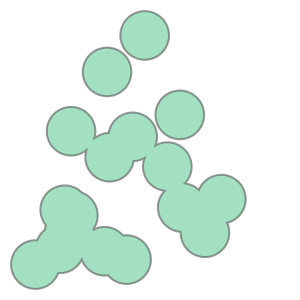

In [ ]:
merged_buffers

In [ ]:
final_candidates['centroid']

61      POINT (127.06251 37.53816)
376     POINT (127.07373 37.55623)
585     POINT (127.07821 37.56526)
671     POINT (127.08059 37.54364)
699     POINT (127.08045 37.56887)
718     POINT (127.08176 37.53733)
755     POINT (127.08157 37.57068)
762     POINT (127.08294 37.52832)
779     POINT (127.08286 37.54364)
816     POINT (127.08407 37.52832)
869      POINT (127.0852 37.52833)
883     POINT (127.08513 37.54095)
897     POINT (127.08507 37.55357)
955     POINT (127.08617 37.55808)
1202     POINT (127.09183 37.5581)
1278    POINT (127.09418 37.54368)
1583     POINT (127.1021 37.54371)
1584    POINT (127.10209 37.54461)
1654    POINT (127.10436 37.54372)
Name: centroid, dtype: geometry

In [ ]:
final_candidates

gid  202410_기준_유아인구수  \
61    다사613488            137.0   
376   다사623508              8.0   
585   다사627518             19.0   
671   다사629494             48.0   
699   다사629522             10.0   
718   다사630487             26.0   
755   다사630524              7.0   
762   다사631477             30.0   
779   다사631494              9.0   
816   다사632477             48.0   
869   다사633477             46.0   
883   다사633491              7.0   
897   다사633505             16.0   
955   다사634510             21.0   
1202  다사639510              7.0   
1278  다사641494             27.0   
1583  다사648494             25.0   
1584  다사648495             39.0   
1654  다사650494             35.0   

                                               geometry  202410_기준_40대인구수  \
61    POLYGON ((328773.198 4156289.692, 328774.794 4...             411.0   
376   POLYGON ((329805.34 4158274.156, 329806.937 41...              71.0   
585   POLYGON ((330221.393 4159267.98, 330222.99 415...              84.0   
671   POLYGON ((330383.116 4156864.281, 330384.712 4...             106.0   
699   POLYGON ((330427.824 4159664.869, 330429.421 4...              58.0   
718   POLYGON ((330471.964 4156162.538, 330473.56 41...             182.0   
755   POLYGON ((330531.039 4159863.314, 330532.636 4...              41.0   
762   POLYGON ((330556.026 4155160.732, 330557.622 4...             139.0   
779   POLYGON ((330583.158 4156861.089, 330584.754 4...              76.0   
816   POLYGON ((330656.047 4155159.137, 330657.643 4...             129.0   
869   POLYGON ((330756.068 4155157.541, 330757.664 4...             127.0   
883   POLYGON ((330778.411 4156557.834, 330780.007 4...              65.0   
897   POLYGON ((330800.76 4157958.126, 330802.357 41...              79.0   
955   POLYGON ((330908.765 4158456.634, 330910.361 4...              93.0   
1202  POLYGON ((331408.868 4158448.65, 331410.465 41...              57.0   
1278  POLYGON ((331583.366 4156845.126, 331584.962 4...             184.0   
1583  POLYGON ((332283.509 4156833.953, 332285.106 4...             131.0   
1584  POLYGON ((332285.106 4156933.973, 332286.702 4...             239.0   
1654  POLYGON ((332483.55 4156830.76, 332485.146 415...             175.0   

      202307_기준_공시지가  202410_기준_총인구수  행정동명  폐업_영업_개월_평균_x  월_평균_소득_금액_x  \
61        7320398.57           411.0   NaN            NaN           NaN   
376       3792230.87            71.0   군자동         49.625     2604535.0   
585       3575367.20            84.0  중곡1동         49.875     2542359.0   
671              NaN           106.0   NaN            NaN     2470026.0   
699       2588472.12            58.0  중곡3동         47.625     2390961.0   
718       6511118.00           182.0   NaN            NaN     2745988.0   
755       3990955.20            41.0  중곡3동         55.500     2390961.0   
762       6881785.13           139.0   NaN            NaN     2999213.0   
779       3672450.02            76.0  구의1동         56.750     2683701.0   
816       6402477.48           129.0   NaN            NaN     2999213.0   
869       5032679.19           127.0   NaN            NaN     2999213.0   
883       4387778.51            65.0  구의1동         45.625     2683701.0   
897       4305001.85            79.0    능동         44.750     2846023.0   
955       3040613.96            93.0  중곡2동         49.250     2555101.0   
1202      2524517.67            57.0  중곡4동         47.125     2523958.0   
1278      6695971.70           184.0   NaN            NaN           NaN   
1583      4181746.46           131.0   NaN            NaN     5284540.0   
1584             NaN           239.0   NaN            NaN     5284540.0   
1654             NaN           175.0   NaN            NaN     5284540.0   

          지출_총금액_x  교육_지출_총금액_x  소득_구간_코드_x     세대수  쇼핑몰개수  키즈카페개수  총수용인원  \
61             NaN          NaN         NaN     NaN    NaN     0.0    NaN   
376   5.461690e+09   88785250.0         6.0     NaN    NaN     0.0    NaN   
585   3.877673e+09   35057750.0      

In [ ]:

# ---------------------- Step 4. 수요지 좌표 추출 ----------------------
gdf2['centroid'] = gdf2.geometry.centroid
gdf3 = gdf2.to_crs(epsg=4326)  # 위경도 좌표계로 거리 계산
final_candidates = final_candidates.to_crs(epsg=4326)

d_coords = np.radians(gdf3['centroid'].apply(lambda p: (p.y, p.x)).tolist())
c_coords = np.radians(final_candidates['centroid'].apply(lambda p: (p.y, p.x)).tolist())
distance_matrix = haversine_distances(d_coords, c_coords) * 6371  # km



##4-6. 최적화 진행

In [ ]:
# ---------------------- Step 5. p-median 최적화 ----------------------
num_demand = len(gdf3)
num_cand = len(final_candidates)
demand_values = gdf3['demand'].values
p = 4  # 설치할 시설 개수

model = LpProblem("p-median", LpMinimize)

x = LpVariable.dicts('x', ((i, j) for i in range(num_demand) for j in range(num_cand)), cat=LpBinary)
y = LpVariable.dicts('y', (j for j in range(num_cand)), cat=LpBinary)

# 목적 함수: 수요 * 거리 최소화
model += lpSum(demand_values[i] * distance_matrix[i][j] * x[(i, j)]
               for i in range(num_demand) for j in range(num_cand))

# 각 수요지는 하나의 후보지에만 할당
for i in range(num_demand):
    model += lpSum(x[(i, j)] for j in range(num_cand)) == 1

# 시설이 설치된 후보지에만 할당 가능
for i in range(num_demand):
    for j in range(num_cand):
        model += x[(i, j)] <= y[j]

# 설치할 시설 개수는 정확히 p개
model += lpSum(y[j] for j in range(num_cand)) == p

# 최적화 수행ㅁ
model.solve()
selected = [j for j in range(num_cand) if y[j].varValue == 1]


##4-7.시각화

In [ ]:
# GeoDataFrame의 좌표계를 WGS84 (EPSG:4326)로 변환
gdf_k1 = gdf_k1.set_crs(epsg=5181, allow_override=True)  # 현재 좌표계가 설정되어 있지 않다면
gdf_k1 = gdf_k1.to_crs(epsg=4326)  # 위경도로 변환

# 중심점 계산
gdf_k1['centroid'] = gdf_k1['geometry'].centroid  # '좌표'가 지오메트리 컬럼이라면
existing_kidscafes_coord = [(geom.y, geom.x) for geom in gdf_k1['centroid']]
existing_kidscafes_coord

<ipython-input-154-0d1a8ad63981>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_k1['centroid'] = gdf_k1['geometry'].centroid  # '좌표'가 지오메트리 컬럼이라면


[(37.540676399999995, 127.098826),
 (37.539428699999995, 127.0915433),
 (37.545499400000004, 127.08877789999998),
 (37.5356993, 127.095765),
 (37.5507515, 127.07087000000001),
 (37.5499175, 127.0823376),
 (37.5469, 127.078044),
 (37.5329729, 127.07708),
 (37.53173, 127.08118030000001),
 (37.5333386, 127.0687835),
 (37.5349189, 127.0703778),
 (37.53100700000001, 127.06422560000001),
 (37.5391252, 127.0696784),
 (37.5382808, 127.0712899),
 (37.5359213, 127.0705285),
 (37.55953830000001, 127.07758200000002),
 (37.55316659999999, 127.09110780000002),
 (37.5649376, 127.0845873)]

In [ ]:
import folium

# 지도 중심 좌표 설정
map_center = [gdf3['centroid'].y.mean(), gdf3['centroid'].x.mean()]
m = folium.Map(location=map_center, zoom_start=12)

# 1. 선택된 후보지 (빨간 마커 + 팝업 항상 띄우기)
selected_candidates = final_candidates.reset_index().iloc[selected]

for i, row in selected_candidates.iterrows():
    # 빨간 마커
    folium.Marker(
        location=[row['centroid'].y, row['centroid'].x],
        icon=folium.Icon(color='red', icon='home', prefix='fa'),
        popup=folium.Popup(
            html=f"p-median: {i} (유아 {int(row['202410_기준_유아인구수'])}명)",
            show=True,  # ← 여기!
            sticky=True,  # ← 위치 고정
            max_width=300
        )
    ).add_to(m)



# 지도 출력
m


In [ ]:

selected_candidates

index       gid  202410_기준_유아인구수  \
0      61  다사613488            137.0   
5     718  다사630487             26.0   
13    955  다사634510             21.0   
15   1278  다사641494             27.0   

                                             geometry  202410_기준_40대인구수  \
0   POLYGON ((328773.198 4156289.692, 328774.794 4...             411.0   
5   POLYGON ((330471.964 4156162.538, 330473.56 41...             182.0   
13  POLYGON ((330908.765 4158456.634, 330910.361 4...              93.0   
15  POLYGON ((331583.366 4156845.126, 331584.962 4...             184.0   

    202307_기준_공시지가  202410_기준_총인구수  행정동명  폐업_영업_개월_평균_x  월_평균_소득_금액_x  \
0       7320398.57           411.0   NaN            NaN           NaN   
5       6511118.00           182.0   NaN            NaN     2745988.0   
13      3040613.96            93.0  중곡2동          49.25     2555101.0   
15      6695971.70           184.0   NaN            NaN           NaN   

        지출_총금액_x  교육_지출_총금액_x  소득_구간_코드_x    세대수  쇼핑몰개수  키즈카페개수  총수용인원  \
0            NaN          NaN         NaN    NaN    NaN     0.0    NaN   
5   5.290530e+09  155421500.0         6.0  265.0    NaN     0.0    NaN   
13  3.220985e+09  150160375.0         6.0    NaN    NaN     0.0    NaN   
15           NaN          NaN         NaN  242.0    NaN     0.0    NaN   

    행정동기반_취약계층비율                    centroid    demand  
0            NaN  POINT (127.06251 37.53816)  0.500000  
5            NaN  POINT (127.08176 37.53733)  0.170358  
13     965.61074  POINT (127.08617 37.55808)  0.277368  
15           NaN  POINT (127.09418 37.54368)  0.171363

In [ ]:
best_candidate_points

gid  202410_기준_유아인구수  \
0  다사613488            137.0   
3  다사630487             26.0   
7  다사633477             46.0   
8  다사641494             27.0   

                                            geometry  202410_기준_40대인구수  \
0  POLYGON ((127.06194876033284 37.53770891698964...             411.0   
3  POLYGON ((127.08119588057035 37.53687739067791...             182.0   
7  POLYGON ((127.08464149649537 37.52787600465827...             127.0   
8  POLYGON ((127.09361228014058 37.54323025476058...             184.0   

   202307_기준_공시지가  202410_기준_총인구수 행정동명  폐업_영업_개월_평균_x  월_평균_소득_금액_x  \
0      7320398.57           411.0  NaN            NaN           NaN   
3      6511118.00           182.0  NaN            NaN     2745988.0   
7      5032679.19           127.0  NaN            NaN     2999213.0   
8      6695971.70           184.0  NaN            NaN           NaN   

       지출_총금액_x  교육_지출_총금액_x  소득_구간_코드_x    세대수  쇼핑몰개수  키즈카페개수  총수용인원  \
0           NaN          NaN         NaN    NaN    NaN     NaN    NaN   
3  5.290530e+09  155421500.0         6.0  265.0    NaN     NaN    NaN   
7  3.317290e+09  161562375.0         7.0  393.0    NaN     NaN    NaN   
8           NaN          NaN         NaN  242.0    NaN     NaN    NaN   

   행정동기반_취약계층비율  클러스터  
0           NaN     3  
3           NaN     3  
7           NaN     3  
8           NaN     3

In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Point

# 1. selected_candidates와 best_candidate_points 준비
selected_candidates = selected_candidates[['centroid', '202410_기준_유아인구수']].copy().reset_index(drop=True)
best_candidate_points = best_candidate_points.copy()
# 유아인구수가 가장 작은 값 하나 제거
selected_candidates = selected_candidates.sort_values(by='202410_기준_유아인구수', ascending=False).iloc[:-1].reset_index(drop=True)


# best_candidate_points를 GeoDataFrame으로 강제 변환
if not isinstance(best_candidate_points, gpd.GeoDataFrame):
    best_candidate_points = gpd.GeoDataFrame(best_candidate_points, geometry='geometry')

# centroid 생성
best_candidate_points['centroid'] = best_candidate_points['geometry'].centroid
best_candidate_points = best_candidate_points[['centroid', '202410_기준_유아인구수']].reset_index(drop=True)

# 2. selected_candidates와 best_candidate_points를 위아래로 단순 합치기
selected_candidates = selected_candidates.reset_index(drop=True)
best_candidate_points = best_candidate_points.reset_index(drop=True)
merged_candidates = pd.concat([selected_candidates, best_candidate_points], ignore_index=True)

# centroid의 x, y 값을 따로 컬럼으로 저장
merged_candidates['x'] = merged_candidates['centroid'].x
merged_candidates['y'] = merged_candidates['centroid'].y

# x, y 소수점 6자리로 반올림 (필요 시 더 줄여도 됨)
merged_candidates['x_rounded'] = merged_candidates['x'].round(6)
merged_candidates['y_rounded'] = merged_candidates['y'].round(6)

# 반올림된 좌표 기준으로 중복 제거
merged_candidates = merged_candidates.drop_duplicates(subset=['x_rounded', 'y_rounded']).reset_index(drop=True)




# 3. 지도 그리기
map_center = [gdf3['centroid'].y.mean(), gdf3['centroid'].x.mean()]
m = folium.Map(location=map_center, zoom_start=12)

# 4. 마커 찍기 (번호 순서대로 깔끔하게)
for i, row in merged_candidates.iterrows():
    folium.Marker(
        location=[row['centroid'].y, row['centroid'].x],
        icon=folium.Icon(color='red', icon='star'),
        popup=folium.Popup(
            html=f"<b>후보지 {i}</b><br>유아인구수: {int(row['202410_기준_유아인구수'])}명",
            show=True,
            sticky=True,
            max_width=250
        )
    ).add_to(m)



# 지도 출력
m


/usr/local/lib/python3.11/dist-packages/geopandas/array.py:1638: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


In [ ]:
# 예: 후보지 0번을 '테스트 후보지'로 따로 표시
merged_candidates.loc[0, '위치'] = '서울특별시 광진구 뚝섬로 468'
merged_candidates.loc[1, '위치'] = '서울특별시 광진구 광나루로 580'
merged_candidates.loc[2, '위치'] = '서울특별시 광진구 아차산로 348'
merged_candidates.loc[3, '위치'] = '서울특별시 광진구 자양동 672-5'

merged_candidates_final = merged_candidates.drop(columns=['x','y',	'x_rounded',	'y_rounded'])


In [ ]:
merged_candidates_final

centroid  202410_기준_유아인구수                   위치
0  POINT (127.06251 37.53816)            137.0    서울특별시 광진구 뚝섬로 468
1  POINT (127.09418 37.54368)             27.0   서울특별시 광진구 광나루로 580
2  POINT (127.08176 37.53733)             26.0   서울특별시 광진구 아차산로 348
3   POINT (127.0852 37.52833)             46.0  서울특별시 광진구 자양동 672-5